## Real Estate Model Building

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## 2. Import Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Final_Project.csv')
df.head(5)

,Unnamed: 0,Property_Name,Location,Region,Property_Age,Availability,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh,USD
0,0,Omkar Alta Monte,W E Highway Malad East Mumbai,Malad Mumbai,0 to 1 Year,Ready To Move,Super Built Up Area,2900.0,17241,14,3,4,500.0,588235.2941
1,1,T Bhimjyani Neelkanth Woods,Manpada Thane Mumbai,Manpada Thane,1 to 5 Year,Ready To Move,Super Built Up Area,1900.0,12631,8,3,3,240.0,282352.9412
2,2,Legend 1 Pramila Nagar,Dahisar West Mumbai,Dahisar Mumbai,10+ Year,Ready To Move,Super Built Up Area,595.0,15966,3,1,2,95.0,111764.7059
3,3,Unnamed Property,Vidyavihar West Vidyavihar West Central Mumbai...,Central Mumbai,5 to 10 Year,Ready To Move,Built Up Area,1450.0,25862,1,3,3,375.0,441176.4706
4,4,Unnamed Property,176 Cst Road Kalina Mumbai 400098 Santacruz Ea...,Santacruz Mumbai,5 to 10 Year,Ready To Move,Carpet Area,876.0,39954,5,2,2,350.0,411764.7059


## 3. Data Cleaning


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2531 entries, 0 to 2530
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2531 non-null   int64  
 1   Property_Name  2531 non-null   object 
 2   Location       2531 non-null   object 
 3   Region         2531 non-null   object 
 4   Property_Age   2531 non-null   object 
 5   Availability   2531 non-null   object 
 6   Area_Tpye      2531 non-null   object 
 7   Area_SqFt      2531 non-null   float64
 8   Rate_SqFt      2531 non-null   int64  
 9   Floor_No       2531 non-null   int64  
 10  Bedroom        2531 non-null   int64  
 11  Bathroom       2531 non-null   int64  
 12  Price_Lakh     2531 non-null   float64
 13  USD            2531 non-null   float64
dtypes: float64(3), int64(5), object(6)
memory usage: 277.0+ KB


In [5]:
df.shape

(2531, 14)

In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
Property_Name,0
Location,0
Region,0
Property_Age,0
Availability,0
Area_Tpye,0
Area_SqFt,0
Rate_SqFt,0
Floor_No,0


In [7]:
df.isna().sum()

,0
Unnamed: 0,0
Property_Name,0
Location,0
Region,0
Property_Age,0
Availability,0
Area_Tpye,0
Area_SqFt,0
Rate_SqFt,0
Floor_No,0


In [8]:
df.describe().round()

,Unnamed: 0,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh,USD
count,2531.0,2531.0,2531.0,2531.0,2531.0,2531.0,2531.0,2531.0
mean,1265.0,949.0,16554.0,9.0,2.0,2.0,161.0,189820.0
std,731.0,487.0,10204.0,8.0,1.0,1.0,162.0,190963.0
min,0.0,185.0,1808.0,-1.0,1.0,1.0,13.0,15294.0
25%,632.0,634.0,8751.0,3.0,1.0,2.0,66.0,77647.0
50%,1265.0,850.0,13636.0,6.0,2.0,2.0,110.0,129412.0
75%,1898.0,1150.0,22314.0,12.0,2.0,2.0,197.0,231765.0
max,2530.0,5000.0,55611.0,55.0,6.0,7.0,1900.0,2235294.0


## 4. Feature Engineering

### 4.1 Drop Unwanted Columns

In [9]:
df.drop(columns=['Property_Name', 'Location','Availability','Unnamed: 0','Price_Lakh'], axis=1, inplace =True)
df.head()

,Region,Property_Age,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,USD
0,Malad Mumbai,0 to 1 Year,Super Built Up Area,2900.0,17241,14,3,4,588235.2941
1,Manpada Thane,1 to 5 Year,Super Built Up Area,1900.0,12631,8,3,3,282352.9412
2,Dahisar Mumbai,10+ Year,Super Built Up Area,595.0,15966,3,1,2,111764.7059
3,Central Mumbai,5 to 10 Year,Built Up Area,1450.0,25862,1,3,3,441176.4706
4,Santacruz Mumbai,5 to 10 Year,Carpet Area,876.0,39954,5,2,2,411764.7059


### 4.2 Label Encoding for Categorical Columns

In [10]:
le = LabelEncoder()

In [11]:
for column in df.describe(include='object').columns:
    df[column] = le.fit_transform(df[column])

In [12]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Region,2531.0,67.56,40.60,0.00,31.00,60.00,107.00,144.00
Property_Age,2531.0,1.30,1.09,0.00,0.00,1.00,2.00,4.00
Area_Tpye,2531.0,1.74,1.18,0.00,1.00,1.00,3.00,3.00
Area_SqFt,2531.0,948.77,486.83,185.00,634.50,850.00,1150.00,5000.00
Rate_SqFt,2531.0,16553.69,10204.27,1808.00,8751.00,13636.00,22314.00,55611.00
Floor_No,2531.0,8.78,7.98,-1.00,3.00,6.00,12.00,55.00
Bedroom,2531.0,1.95,0.83,1.00,1.00,2.00,2.00,6.00
Bathroom,2531.0,2.05,0.74,1.00,2.00,2.00,2.00,7.00
USD,2531.0,189819.97,190962.94,15294.12,77647.06,129411.76,231764.71,2235294.12


In [13]:
df.head()

,Region,Property_Age,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,USD
0,69,0,3,2900.0,17241,14,3,4,588235.2941
1,73,1,3,1900.0,12631,8,3,3,282352.9412
2,24,2,3,595.0,15966,3,1,2,111764.7059
3,18,3,0,1450.0,25862,1,3,3,441176.4706
4,107,3,1,876.0,39954,5,2,2,411764.7059


### 4.3 Looking for Minimum & Maximum

In [14]:
for i in df.columns:
    print(i,'Min value :', df[i].min(),'Max value :', df[i].max())

Region Min value : 0 Max value : 144
Property_Age Min value : 0 Max value : 4
Area_Tpye Min value : 0 Max value : 3
Area_SqFt Min value : 185.0 Max value : 5000.0
Rate_SqFt Min value : 1808 Max value : 55611
Floor_No Min value : -1 Max value : 55
Bedroom Min value : 1 Max value : 6
Bathroom Min value : 1 Max value : 7
USD Min value : 15294.11765 Max value : 2235294.118


### 4.4 Correlation Heatmap

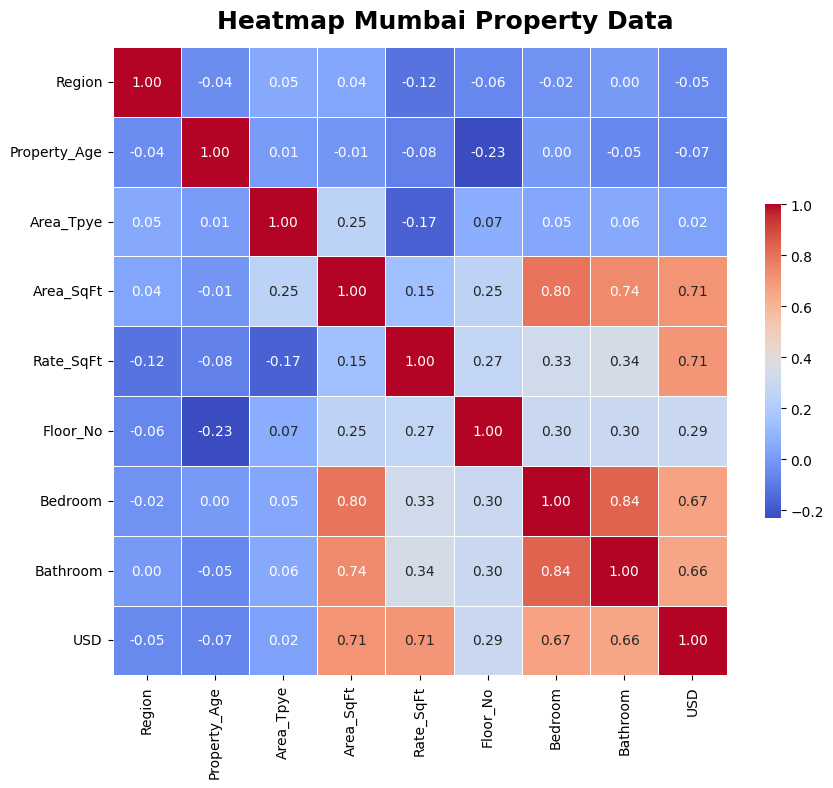

In [15]:
fig = plt.figure( figsize =(9,8))
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}
sns.heatmap(df.corr(),annot = True, linewidths=.5, cbar_kws={"shrink": .5},fmt='.2f', cmap='coolwarm')
fig.suptitle('Heatmap Mumbai Property Data',fontsize=18, fontweight="bold")
pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

fig.savefig('Heatmap_Encoding', dpi = 250)

## 5. Model Building

In [16]:
df.head()

,Region,Property_Age,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,USD
0,69,0,3,2900.0,17241,14,3,4,588235.2941
1,73,1,3,1900.0,12631,8,3,3,282352.9412
2,24,2,3,595.0,15966,3,1,2,111764.7059
3,18,3,0,1450.0,25862,1,3,3,441176.4706
4,107,3,1,876.0,39954,5,2,2,411764.7059


### 5.1 Train Test Split

In [18]:
X =  df.drop('USD', axis = 1)
y =  df['USD']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state = 12)

In [20]:
print(X_train.shape, X_test.shape)

(2024, 8) (507, 8)


### 5.2 Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()
linear.fit(X_train, y_train)

print("Training Accuracy = ", linear.score(X_train, y_train))
print("Test Accuracy     = ", linear.score(X_test, y_test))

Training Accuracy =  0.8731258510032343
Test Accuracy     =  0.8700904136665534


### 5.3 Decision Tree Regressor

In [22]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(min_samples_split=2)
dt.fit(X_train, y_train)

print("Training Accuracy = ", dt.score(X_train, y_train))
print("Test Accuracy     = ", dt.score(X_test, y_test))

Training Accuracy =  1.0
Test Accuracy     =  0.9473347150928036


### 5.4 Random Forest Regressor

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, max_depth=5, random_state = 12)
rf.fit(X_train, y_train);

print("Training Accuracy = ", rf.score(X_train, y_train))
print("Test Accuracy     = ", rf.score(X_test, y_test))

Training Accuracy =  0.9753697896976002
Test Accuracy     =  0.9620328292431918


### 5.5 Polynomial Features

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

# Define the pipeline and train model
poly_model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                       ('rf', RandomForestRegressor(n_estimators = 1000, max_depth=5, random_state = 12))])
poly_model.fit(X_train, y_train)

# Calculate the Score
print("Training Accuracy = ", poly_model.score(X_train, y_train))
print("Test Accuracy     = ", poly_model.score(X_test, y_test))

Training Accuracy =  0.9903242586961948
Test Accuracy     =  0.9826474539604119


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

# Define the pipeline and train model
poly_model = Pipeline([('poly', PolynomialFeatures(degree=2)), ('linear', LinearRegression(fit_intercept=False))])
poly_model.fit(X_train, y_train)

# Calculate the Score
print("Training Accuracy = ", poly_model.score(X_train, y_train))
print("Test Accuracy     = ", poly_model.score(X_test, y_test))

Training Accuracy =  0.9833793673365262
Test Accuracy     =  0.9877270239335902


## Obeservaion :
### 1. We select the final model - Polynomial Feature.
### 2. We got 98.73 % Model Accuracy.

## 6. Final Model Evaluation

In [26]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    accuracy = model.score(test_features, test_labels)

    print('Average Error  = {:0.4f} degrees'.format(np.mean(errors)))
    print('Model Accuracy = {:0.4f} %'.format(accuracy))

In [27]:
evaluate(poly_model, X_train, y_train)

Average Error  = 9627.2517 degrees
Model Accuracy = 0.9834 %


In [28]:
evaluate(poly_model, X_test, y_test)

Average Error  = 10199.8944 degrees
Model Accuracy = 0.9877 %


### 6.1 Visualizing Results

In [29]:
pred = poly_model.predict(X_test)

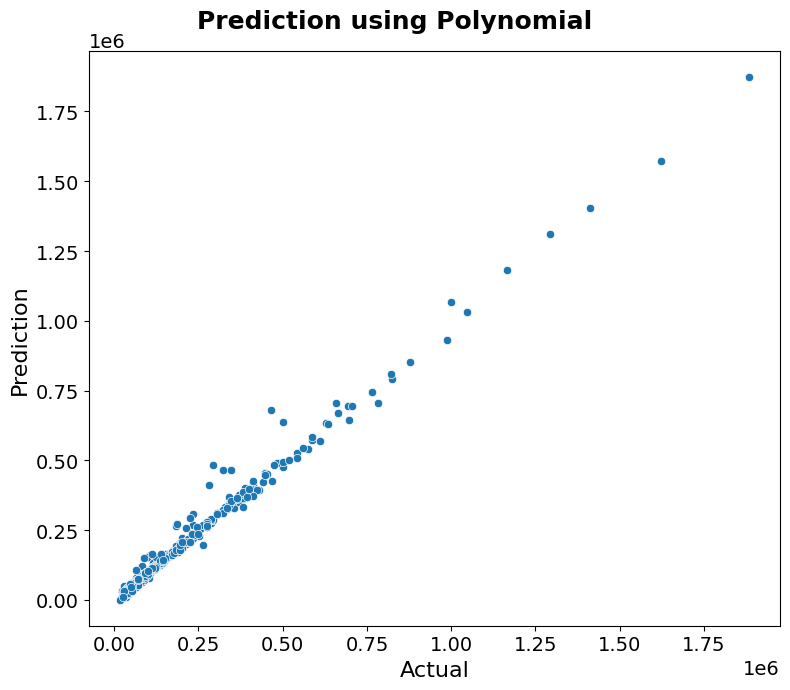

In [31]:
fig = plt.figure(figsize=(8,7))

# Pass data as a dictionary or DataFrame with 'x' and 'y' keys
sns.scatterplot(x=y_test, y=pred)

fig.suptitle('Prediction using Polynomial', fontsize=18, fontweight='bold')
plt.xlabel("Actual")
plt.ylabel("Prediction")
pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()

#fig.savefig('Prediction_Polynomial', dpi=500)

## 7. Model Deployement

In [32]:
from pickle import dump

In [33]:
dump(poly_model,open('regression_model.pkl','wb'))